In [1]:
# we're in the endgame now

from controller import *
%matplotlib inline

Starting at timestep 1


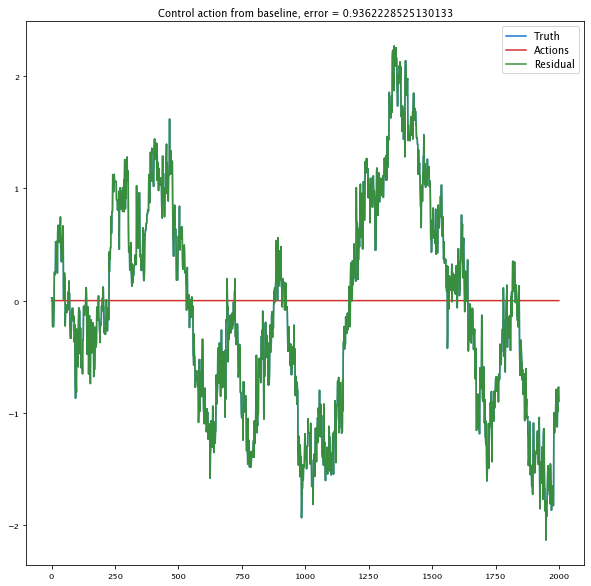

In [2]:
show_control('baseline')

Starting at timestep 3
0.014929711532455472
-0.257560049176769
-0.31403674213926885
-0.24081024136143797
-0.22449162476181983
-0.1535950352874627
-0.017074777682080555
0.028461168246121694
0.2978093775913346
0.4082906621114799
0.31195618623702964
0.24645593241185365
0.30359932108949056
0.5090203339569147
0.3812224431592828
0.4281914995595346
0.38289858287068884
0.37916295694104274
0.4567379768695796
0.412641469126081
0.0344196506583763
0.5320363850645997
0.5106314758120648
0.5330770344700405
0.4391585379884027
0.48271945460887167
0.18969028420256906
0.2735324361500197
0.31186586495121055
0.2239359566840361
0.2618584919472844
0.3333175140071356
0.344468523482563
0.15724360967698664
0.015185468062402542
-0.11099175173412845
-0.03190694847561284
0.009614692875762491
0.040940023853608856
0.08195015731621155
0.32327631522075956
0.287104250827482
0.11609335658125351
0.17469609216223436
-0.42626566122749004
-0.3765515675698167
-0.11972598432889114
-0.23874421473075538
-0.17930296908147264
-0.

-0.19554261669011724
-0.4235186459769117
-0.36516652571048364
-0.16205767578759656
-0.18972983824025266
0.10245751178470106
0.013341748817256124
0.22438393838331372
-0.18226854715093327
-0.0700170908915489
-0.28751934701562165
-0.20991997675217117
0.1539393841420249
-0.10522351843754021
-0.2491615684272924
0.019486141031891828
0.02869623314249739
-0.04656720642174167
-0.11306757898894827
-0.18408685406208003
-0.09364056143325844
0.05304160130918815
0.01156532421444153
-0.050584242705051116
0.02296855463820407
-0.008358419211650682
0.12126149178909226
0.0737308789563896
-0.05670181977988392
-0.13182588216411326
-0.2508133361672254
-0.18725478231336828
-0.019634113983550402
-0.38336631459957016
-0.5899903206578831
-0.5536002079035005
-0.487889933920314
-0.6429731068237169
-0.5822514782799975
-0.3001290719852397
-0.14923468033590112
-0.3174673641542619
-0.2885328882086605
-0.4043748218822621
-0.05632780963237671
-0.3093117347118188
-0.35039700108749694
-0.27154408167029453
-0.297841159793

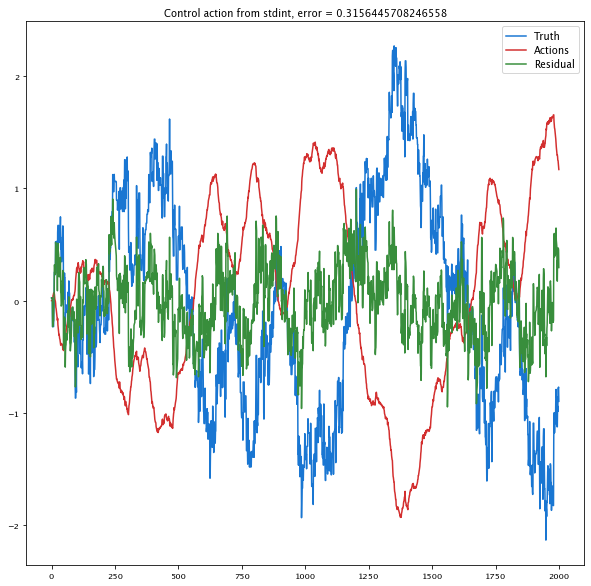

In [3]:
show_control('stdint')

[-0.10127489 -0.24396645 -0.3504369  -0.30128175 -0.14486791 -0.20331486
  0.06028909 -0.02687239 -0.00491    -0.00411367]
Starting at timestep 10


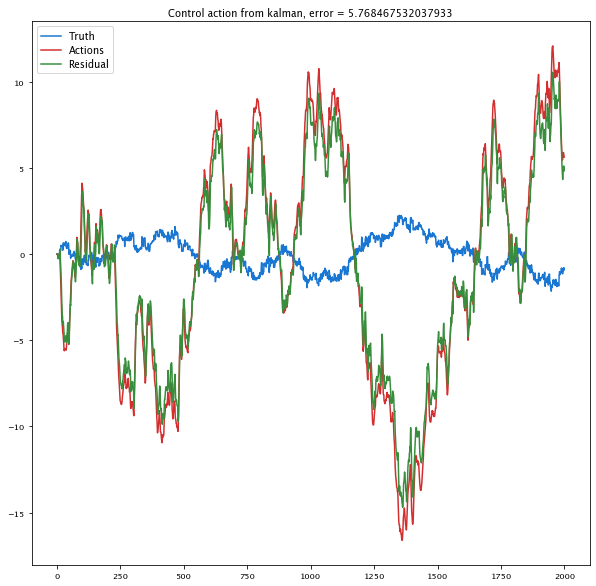

In [4]:
print(kalman.kfilter.state)
show_control('kalman')

(1e-07, 2.6630869514667626)

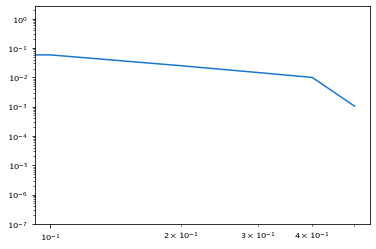

In [5]:
plt.loglog(*signal.periodogram(kalman.kfilter.A[0]))
plt.ylim(1e-7)

In [6]:
kalman = Controller('kalman', make_kfilter_turb(make_impulse(truth[:size//2], N=N), truth[:N] + np.random.normal(0, noise, (N,))))


In [7]:
kalman.state

array([], dtype=float64)